In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv('/Users/bonnyma/Downloads/sales_data.csv')

In [4]:
df

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05
...,...,...,...,...,...
1045,Product_45,Region_7,78.69,8.0,2022-07-28
1046,Product_1,Region_6,NaN,8.0,2022-08-02
1047,Product_17,Region_2,114.37,11.0,2023-12-18
1048,NaN,Region_8,NaN,5.0,2023-12-27


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [6]:
df.describe(include='all')


,Product,Region,Price,Units Sold,Sale Date
count,947,946,945.000000,946.000000,1050
unique,50,10,NaN,NaN,1000
top,Product_45,Region_9,NaN,NaN,2022-07-28
freq,28,109,NaN,NaN,2
mean,NaN,NaN,107.598688,10.048626,NaN
std,NaN,NaN,124.020322,3.172261,NaN
min,NaN,NaN,0.200000,2.000000,NaN
25%,NaN,NaN,29.430000,8.000000,NaN
50%,NaN,NaN,78.130000,10.000000,NaN
75%,NaN,NaN,142.570000,12.000000,NaN


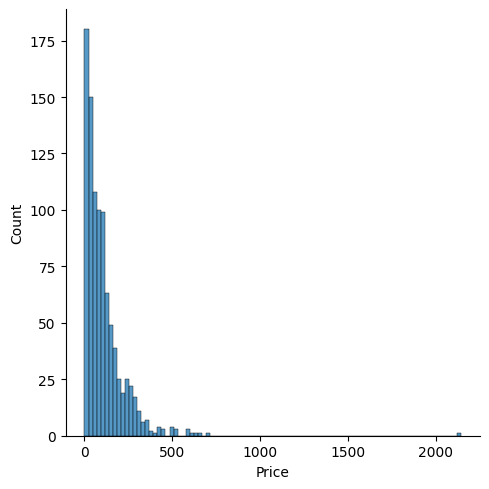

In [7]:
sns.displot(df['Price'])

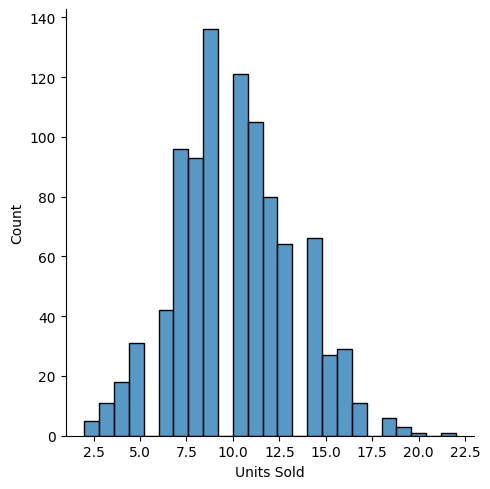

In [8]:
sns.displot(df['Units Sold'])

In [9]:
df = df.dropna(subset=['Product', 'Region'])
df.isnull().sum()

Product        0
Region         0
Price         89
Units Sold    82
Sale Date      0
dtype: int64

In [10]:
df['Price'] = df.groupby('Product')['Price'].transform(lambda x: x.fillna(x.mean()))

/var/folders/7d/5_pc32c13z56jfk3mzgs14yh0000gn/T/ipykernel_34703/1050725638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'] = df.groupby('Product')['Price'].transform(lambda x: x.fillna(x.mean()))


In [11]:
df=df.fillna(df['Units Sold'].mean())

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 853 entries, 2 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     853 non-null    object 
 1   Region      853 non-null    object 
 2   Price       853 non-null    float64
 3   Units Sold  853 non-null    float64
 4   Sale Date   853 non-null    object 
dtypes: float64(2), object(3)
memory usage: 40.0+ KB


In [13]:
df = df.reset_index(drop=True)
df

,Product,Region,Price,Units Sold,Sale Date
0,Product_46,Region_3,20.430000,12.0,2022-01-03
1,Product_36,Region_1,12.770000,10.0,2022-01-04
2,Product_17,Region_6,125.690000,6.0,2022-01-05
3,Product_45,Region_1,8.630000,11.0,2022-01-06
4,Product_31,Region_3,23.730000,6.0,2022-01-07
...,...,...,...,...,...
848,Product_48,Region_10,23.570000,6.0,2024-02-28
849,Product_45,Region_7,78.690000,8.0,2022-07-28
850,Product_1,Region_6,76.383125,8.0,2022-08-02
851,Product_17,Region_2,114.370000,11.0,2023-12-18


**Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?**


According to the 'info()'funtion the data set contains some missing values, because this analysis is find insights based on "Product" and "Region", so if I fill the missing value may have bad impact on the overall data quality and accurancy. so I decide to drop the missing value for product and region. 

After dropping the missing value for product and region, it shows that there are another 89 missing values for price, as the standard deviationof the price is pretty big,and the mean is larger than median,therefore the data is right skewed. So instead of using the average of the entire price column, I decide to fill the missing value by using the average price of each product group.

For the 'Units Sold', the mean is equal to median, and standard deviation is fairly small, so I decide to use the average of whole 'Units Sold' data to fill the missing value.





In [14]:
df['Sales']=df['Price']*df['Units Sold']
df

,Product,Region,Price,Units Sold,Sale Date,Sales
0,Product_46,Region_3,20.430000,12.0,2022-01-03,245.160
1,Product_36,Region_1,12.770000,10.0,2022-01-04,127.700
2,Product_17,Region_6,125.690000,6.0,2022-01-05,754.140
3,Product_45,Region_1,8.630000,11.0,2022-01-06,94.930
4,Product_31,Region_3,23.730000,6.0,2022-01-07,142.380
...,...,...,...,...,...,...
848,Product_48,Region_10,23.570000,6.0,2024-02-28,141.420
849,Product_45,Region_7,78.690000,8.0,2022-07-28,629.520
850,Product_1,Region_6,76.383125,8.0,2022-08-02,611.065
851,Product_17,Region_2,114.370000,11.0,2023-12-18,1258.070


In [15]:
#The Top 10 sales product
df_Product=pd.DataFrame(df.groupby(df['Product'])['Sales'].sum())
df_Product.sort_values('Sales',ascending=False).head(10)

,Sales
Product,
Product_15,34975.531645
Product_26,32157.025000
Product_31,31616.330000
Product_41,29376.714667
Product_50,26809.665543
Product_48,26803.380000
Product_29,26320.981245
Product_14,25480.653769
Product_2,24737.815927


In [16]:
#Top ten best selling products
df_units_sold=pd.DataFrame(df.groupby(df['Product'])['Units Sold'].sum())
df_units_sold.sort_values('Units Sold',ascending=False).head(10)

,Units Sold
Product,
Product_13,261.181582
Product_5,260.544747
Product_50,241.181582
Product_4,237.090791
Product_48,222.000000
Product_43,220.090791
Product_31,216.000000
Product_30,211.453956
Product_17,202.090791


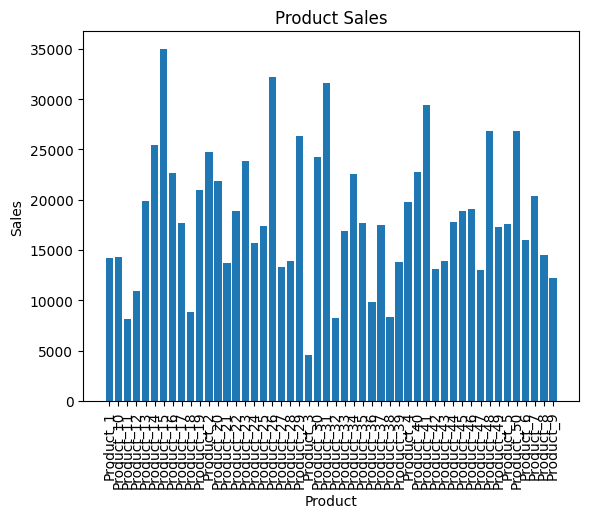

<Figure size 3000x600 with 0 Axes>

In [17]:

plt.bar(df.groupby(df['Product'])['Product'].count().index, df.groupby(df['Product'])['Sales'].sum())
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Product Sales')
plt.xticks(rotation='vertical')
plt.figure(figsize=(30,6))
plt.show()

In [18]:
df['Sale Date'] = pd.to_datetime(df['Sale Date'])
df['month_year'] = df['Sale Date'].apply(lambda x: x.strftime('%Y-%m'))
df_date=df.groupby('month_year')['Sales'].sum() .reset_index()

Text(0.5, 1.0, 'Sales over Time')

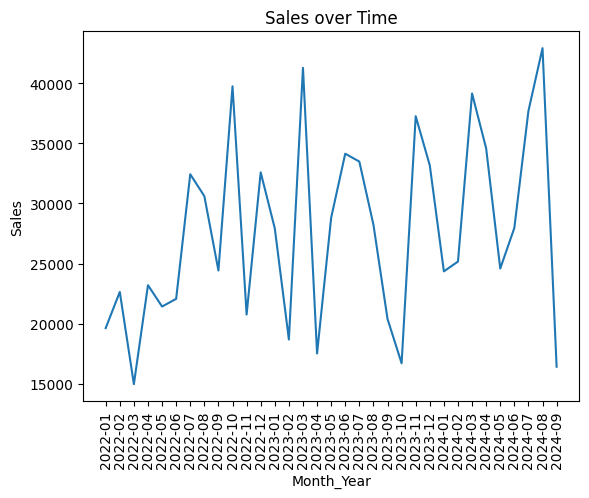

In [19]:

plt.plot(df_date['month_year'],df_date['Sales'])
plt.xticks(rotation='vertical')
plt.xlabel('Month_Year')
plt.ylabel('Sales')
plt.title('Sales over Time')

Text(0.5, 1.0, 'Sales Over Month')

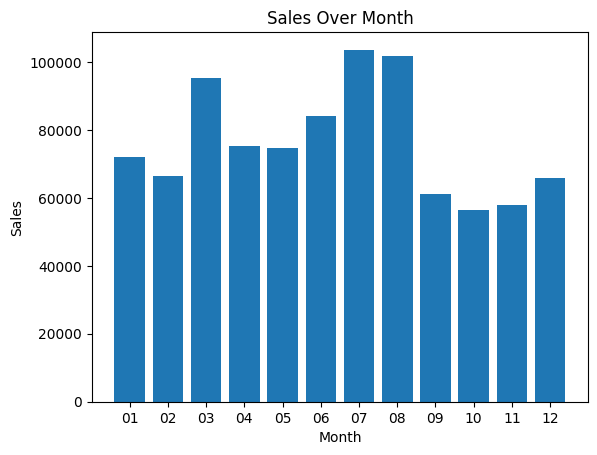

In [20]:
df['Month']=df['Sale Date'].apply(lambda x:x.strftime('%m'))
df_month=df.groupby('Month')['Sales'].sum().reset_index()
plt.bar(df_month['Month'],df_month['Sales'])
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales Over Month')


In [21]:
#The best selling region
df_Region=pd.DataFrame(df.groupby('Region')['Sales'].sum())
df_Region.sort_values('Sales',ascending=False)

,Sales
Region,
Region_8,135237.793872
Region_9,109446.453547
Region_4,97979.933008
Region_2,94445.635337
Region_10,91183.995212
Region_5,90829.457574
Region_3,82101.184346
Region_1,76136.358351
Region_6,74796.709826


/var/folders/7d/5_pc32c13z56jfk3mzgs14yh0000gn/T/ipykernel_34703/2366278206.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Product,rotation='vertical',size=8)


[Text(0, 0, 'Product_1'),
 Text(1, 0, 'Product_10'),
 Text(2, 0, 'Product_11'),
 Text(3, 0, 'Product_12'),
 Text(4, 0, 'Product_13'),
 Text(5, 0, 'Product_14'),
 Text(6, 0, 'Product_15'),
 Text(7, 0, 'Product_16'),
 Text(8, 0, 'Product_17'),
 Text(9, 0, 'Product_18'),
 Text(10, 0, 'Product_19'),
 Text(11, 0, 'Product_2'),
 Text(12, 0, 'Product_20'),
 Text(13, 0, 'Product_21'),
 Text(14, 0, 'Product_22'),
 Text(15, 0, 'Product_23'),
 Text(16, 0, 'Product_24'),
 Text(17, 0, 'Product_25'),
 Text(18, 0, 'Product_26'),
 Text(19, 0, 'Product_27'),
 Text(20, 0, 'Product_28'),
 Text(21, 0, 'Product_29'),
 Text(22, 0, 'Product_3'),
 Text(23, 0, 'Product_30'),
 Text(24, 0, 'Product_31'),
 Text(25, 0, 'Product_32'),
 Text(26, 0, 'Product_33'),
 Text(27, 0, 'Product_34'),
 Text(28, 0, 'Product_35'),
 Text(29, 0, 'Product_36'),
 Text(30, 0, 'Product_37'),
 Text(31, 0, 'Product_38'),
 Text(32, 0, 'Product_39'),
 Text(33, 0, 'Product_4'),
 Text(34, 0, 'Product_40'),
 Text(35, 0, 'Product_41'),
 Text(

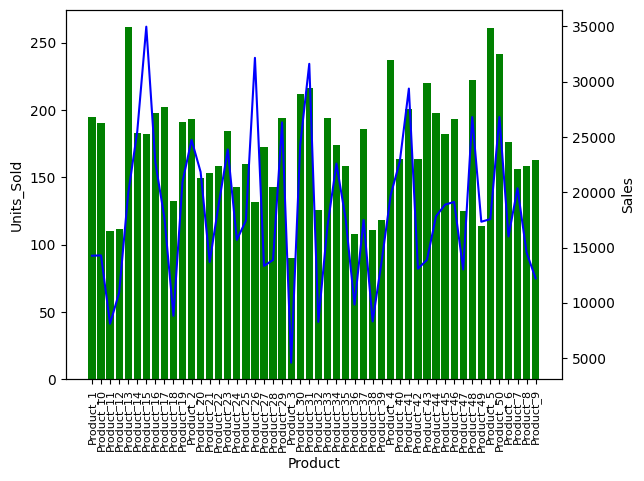

In [25]:
Sale=df.groupby('Product')['Sales'].sum()
Product=df.groupby('Product')['Product'].count() .index
Units_Sold=df.groupby('Product')['Units Sold'].sum()

fig, ax1=plt.subplots()

ax2= ax1.twinx()
ax1.bar(Product, Units_Sold, color='g')
ax2.plot(Product,Sale, 'b-')

ax1.set_xlabel('Product')
ax1.set_ylabel('Units_Sold')
ax2.set_ylabel('Sales')
ax1.set_xticklabels(Product,rotation='vertical',size=8)

**What conclusions can you draw about sales performance of various products and regions?**

According to the outcome it shows the Top ten best selling products, the best selling region, and the Top 10 sales product. According to the "Sales over Time" graph, it shows the sales has an increasing trend over years, it means the company is on its rise phrase, as long as ther is no special financial crisis, it has high possibility that the company will have better sales in the future.

In [22]:
df_RP=pd.DataFrame(df.groupby(['Region','Product'])['Sales'].sum())
df_RP.sort_values(['Region','Sales'],ascending=False)


Sales
Region   Product             
Region_9 Product_4   6517.300
         Product_34  6357.865
         Product_40  5806.870
         Product_2   5197.150
         Product_33  4813.710
...                       ...
Region_1 Product_42   239.220
         Product_44   130.450
         Product_40   115.500
         Product_4     55.300
         Product_16    10.560

[410 rows x 1 columns]

/Users/bonnyma/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


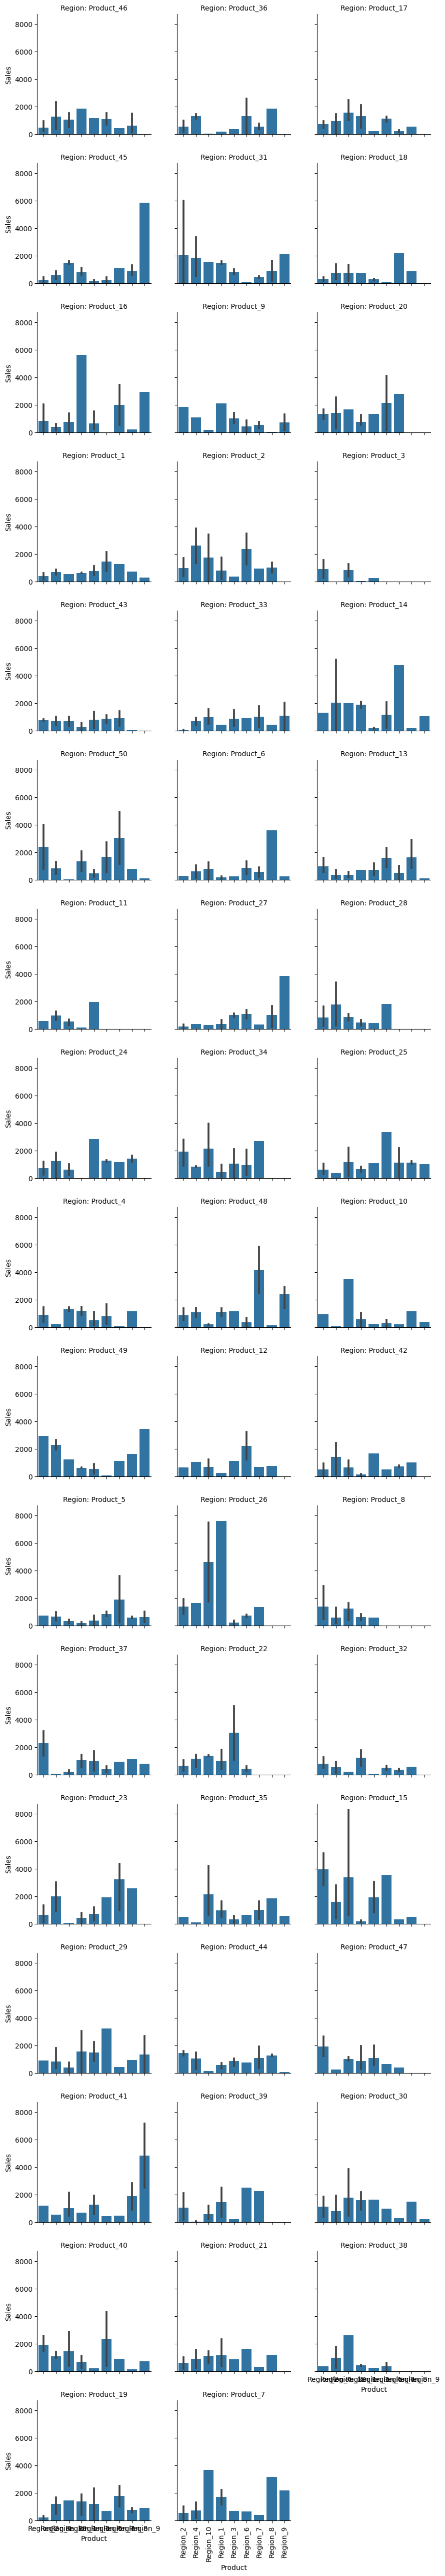

In [23]:
g = sns.FacetGrid(df, col='Product', col_wrap=3)
g.map(sns.barplot, 'Region', 'Sales')
g.set_axis_labels('Product', 'Sales')
g.set_titles('Region: {col_name}')
plt.xticks(rotation='vertical')
plt.show()

**What recommendations do you have for the business?**

According to the "sales over month"graph, it shows the comapny experiencing low sales during month of Febreury, September, October, November. I suggest during these months, the company should come up with some sale campaigns, to give customer incentives to purchase the product. Additionally, the company can focus more on the marketing and advertising side. Consider new marketing techniques such as influencer collaborations, social media promotions, or content marketing to generate interest and reach a wider audience. By enlarging the customer size, the company can introduce referral program combined with the discont promotion.

The graphs of "Product VS Region" shows that different region has different products preference. For example, Region_10 has preference of Product_26 and product_7. The company should adapt marketing and messaging: Customize marketing and messaging for each region to resonate with the local audience. Consider cultural nuances, language preferences, and communication channels that are most effective in reaching customers in each specific region. Localization of your marketing efforts can help increase relevance and engagement. For instance, develop region-specific promotions and marketing campaigns to address the unique characteristics and preferences of each region. Tailor offers, discounts, or incentives to align with the needs and interests of customers in different regions. This targeted approach can help drive sales and increase customer engagement.

The company also has a few poor performed products, for example, product_3, it has poor sales across the region. I would recommend that company do a market research to collect the customer thoughts of a specific product. After getting result from the market result, the company is able to see if there is a gap between the customer expectation and the product funtionality, or it's due to a lack of customer understanding or awareness of the product's value. After knowing the reason of the performance the company should go over the product design, price, positioning, and come up with the mitigatio plan to accommodate the poor performance.